## Multiclass Logistic Regression Model

In [1]:
import pandas as pd

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN"], axis=1)

credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [2]:
credit_df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [5]:
#Data preparation

from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [6]:
X_train.head()

,Age,Month,Annual_Income,Num_Bank_Accounts,Changed_Credit_Limit,Num_Credit_Card,Credit_History_Age,Monthly_Balance,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Good,Credit_Mix_Standard
64281,16.0,2,40896.90,5.0,10.19,3.0,323.0,353.009078,4.0,365.97,101.521668,0,1,1,0,0,0,0,0,1
2990,20.0,7,133410.66,1.0,1.05,3.0,334.0,1154.040317,3.0,933.84,0.000000,1,0,1,0,0,0,0,1,0
44752,19.0,1,17923.05,10.0,6.54,8.0,166.0,213.255798,8.0,3549.71,63.155407,0,1,0,0,0,0,1,0,0
16129,32.0,2,18070.01,9.0,8.89,7.0,108.0,306.187343,8.0,2493.97,43.480684,0,1,0,1,0,0,0,0,0
12046,29.0,7,173569.20,1.0,5.34,5.0,367.0,54.881153,0.0,190.40,206.246801,1,0,0,0,0,0,0,1,0


In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, solver="saga")
lr = logreg.fit(X_train, y_train)

/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
print("Train: ", lr.score(X_train, y_train))
print("Test: ", lr.score(X_test, y_test))

Train:  0.54265
Test:  0.5418


In [14]:
lr.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[ 139,   78, 3381],
       [  39, 1807, 3969],
       [ 189, 1508, 8890]])

In [19]:
## using Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.999975
0.8209


In [21]:
confusion_matrix(y_test, rf.predict(X_test))

array([[2854,    9,  735],
       [  74, 4807,  934],
       [ 715, 1115, 8757]])

In [35]:
df = pd.DataFrame(
    {"X":X_test.index,
    "y_actual": y_test,
    "y_predicted": rf.predict(X_test)}
)

In [49]:
df[df["y_actual"] != df["y_predicted"]]

,X,y_actual,y_predicted
29210,29210,Standard,Good
26125,26125,Good,Standard
54662,54662,Standard,Good
12353,12353,Poor,Standard
21639,21639,Standard,Poor
...,...,...,...
3090,3090,Standard,Good
22303,22303,Good,Standard
55964,55964,Good,Standard
76577,76577,Poor,Standard


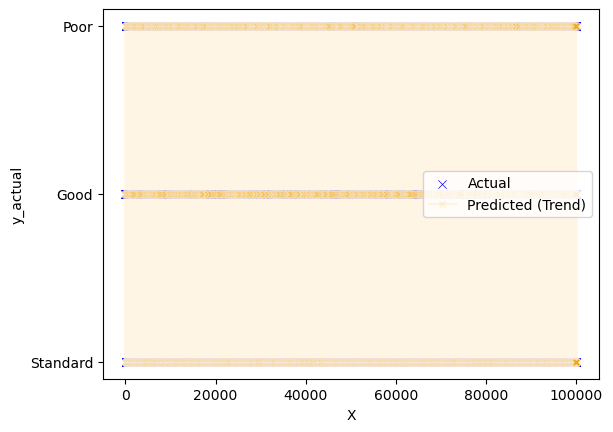

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, ax = plt.subplots()
sns.scatterplot(x=df["X"],y=df["y_actual"],marker='x', label='Actual',color='blue',ax=ax)
sns.lineplot(x=df["X"], y=df["y_predicted"], ax=ax, color='orange', label="Predicted (Trend)", marker='X',alpha=0.10)
plt.show();